In [2]:
pip install yfinance

     |████████████████████████████████| 6.3 MB 12.3 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=899873bbb79002ed8ea1c3e0a34cf5e27b9440b7b75cff24ac23a089cf914f49
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [3]:
pip install mplfinance

     |████████████████████████████████| 62 kB 742 kB/s 


### Import Libraries

In [4]:
import yfinance as yf
import mplfinance as mpf
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

### Getting the data

In [5]:
tsla=yf.Ticker("TSLA").history('5y')

In [6]:
mpf.plot(tsla, savefig='img.png')

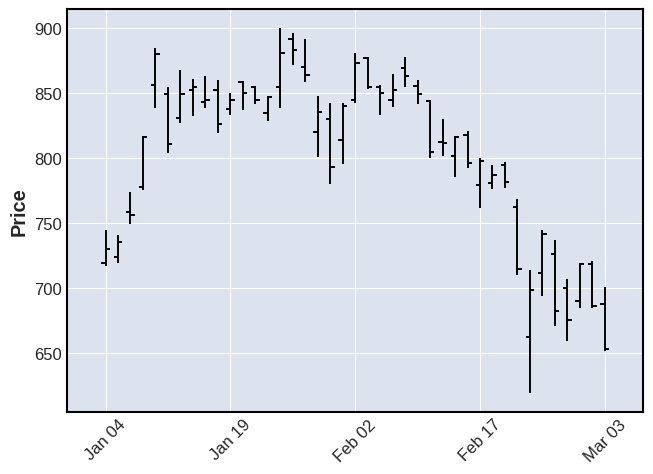

In [7]:
mpf.plot(tsla['2021-01-01':'2021-03-03'])

### Using data from csv file

In [8]:
#Download data 
tsla.to_csv('tsla.csv')
data=pd.read_csv('tsla.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1258 non-null   object 
 1   Open          1258 non-null   float64
 2   High          1258 non-null   float64
 3   Low           1258 non-null   float64
 4   Close         1258 non-null   float64
 5   Volume        1258 non-null   int64  
 6   Dividends     1258 non-null   int64  
 7   Stock Splits  1258 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 78.8+ KB


### Pre-process data for mpf

In [9]:
data.Date=pd.to_datetime(data.Date)  #change 
data=data.set_index('Date')

### OHLC Chart (default)

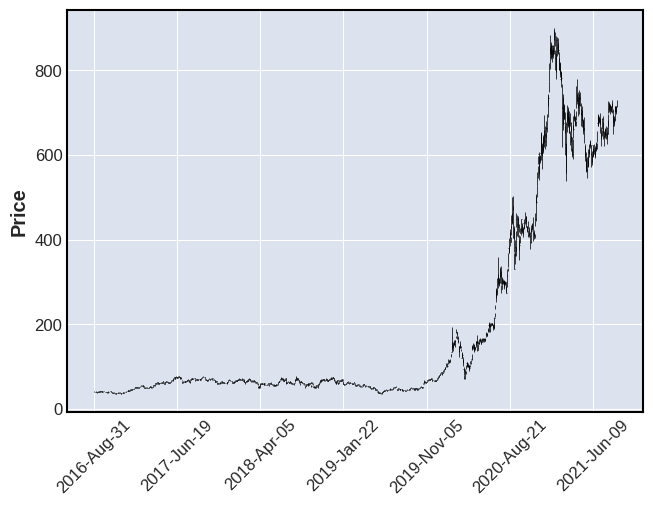

In [10]:
mpf.plot(data)

### Slicing the data

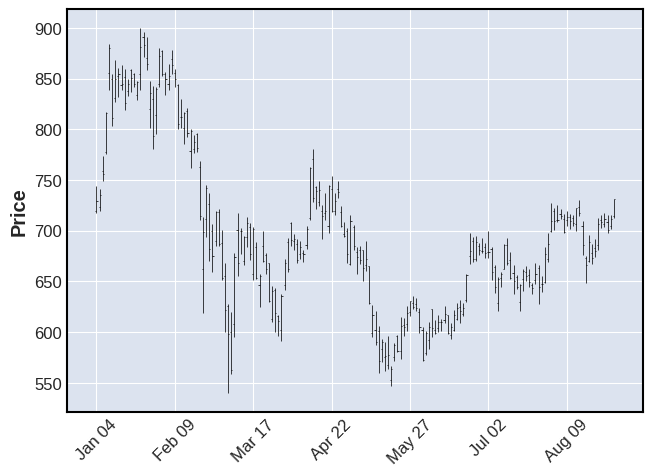

In [11]:
mpf.plot(data['2021'])

### Line chart

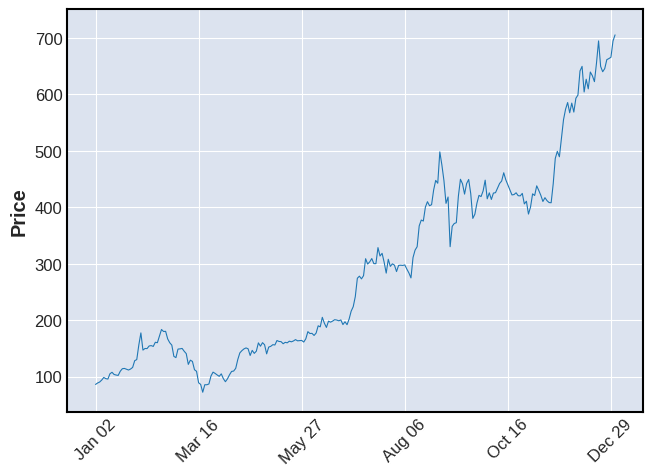

In [12]:
mpf.plot(data['2020'], type='line')

### Candlestick Chart

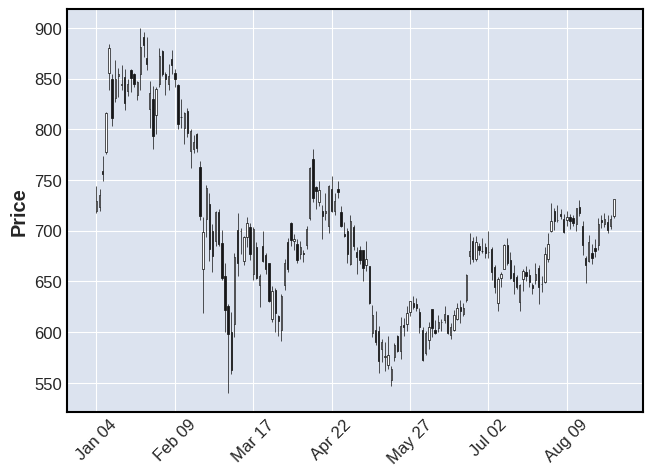

In [13]:
mpf.plot(data['2021'], type='candle')

### Renko Chart

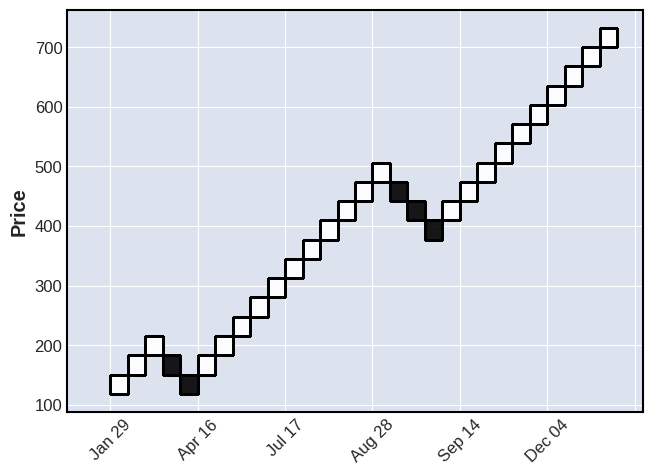

In [14]:
mpf.plot(data['2020'], type='renko')

### Point and Figure Chart

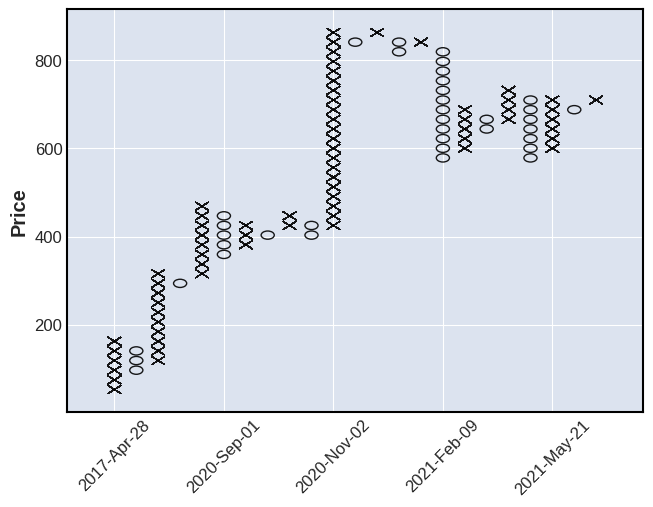

In [15]:
mpf.plot(data, type='pnf')

### Adding Trading Volume

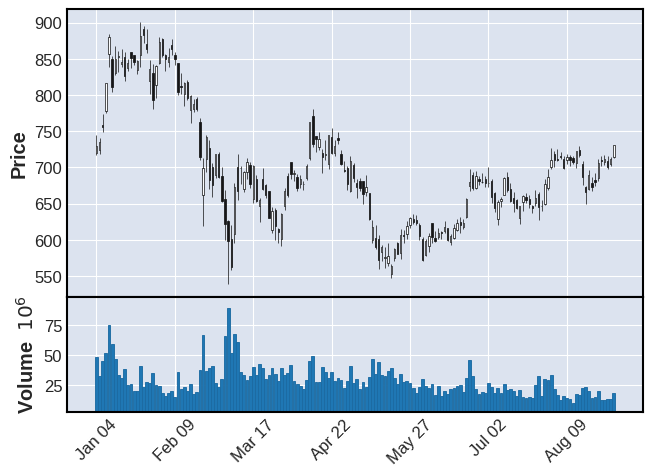

In [16]:
mpf.plot(data['2021'], type='candle', volume=True)

### Adding Moving Averages

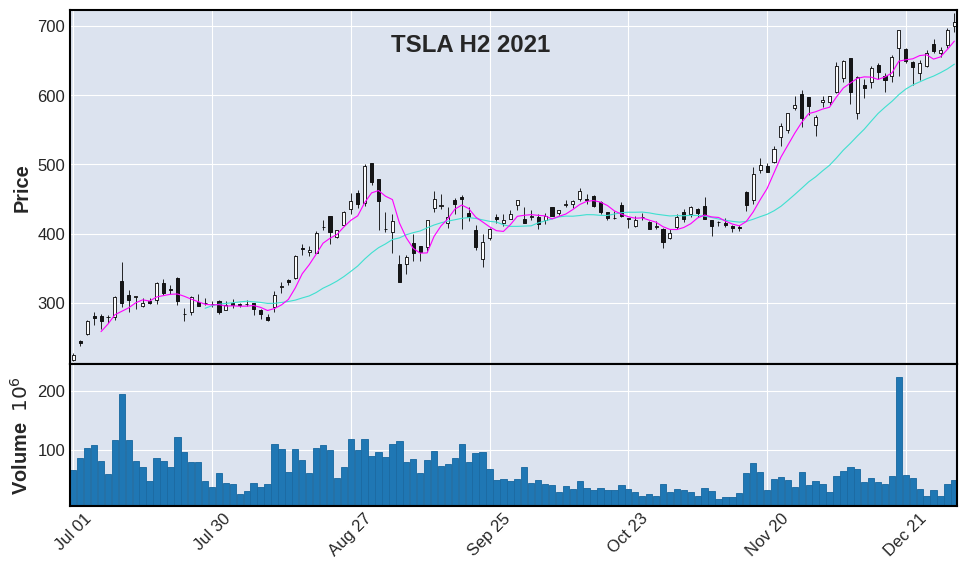

In [18]:
mpf.plot(data['2020-07':'2020-12'], type='candle', 
         volume=True, mav=(20,5),title = 'TSLA H2 2021',
        tight_layout=True, figratio=(16,9) )

### Using custom style

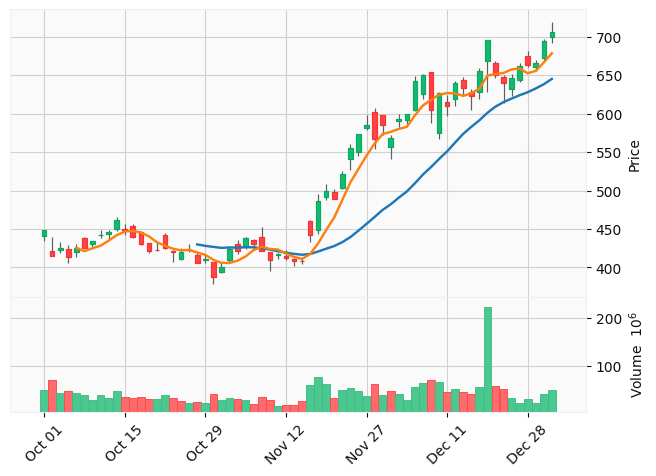

In [19]:
mpf.plot(data['2020-10':'2020-12'], type='candle', volume=True, mav=(20,5), style='yahoo')

In [20]:
mpf.available_styles()

['binance',
 'blueskies',
 'brasil',
 'charles',
 'checkers',
 'classic',
 'default',
 'ibd',
 'kenan',
 'mike',
 'nightclouds',
 'sas',
 'starsandstripes',
 'yahoo']

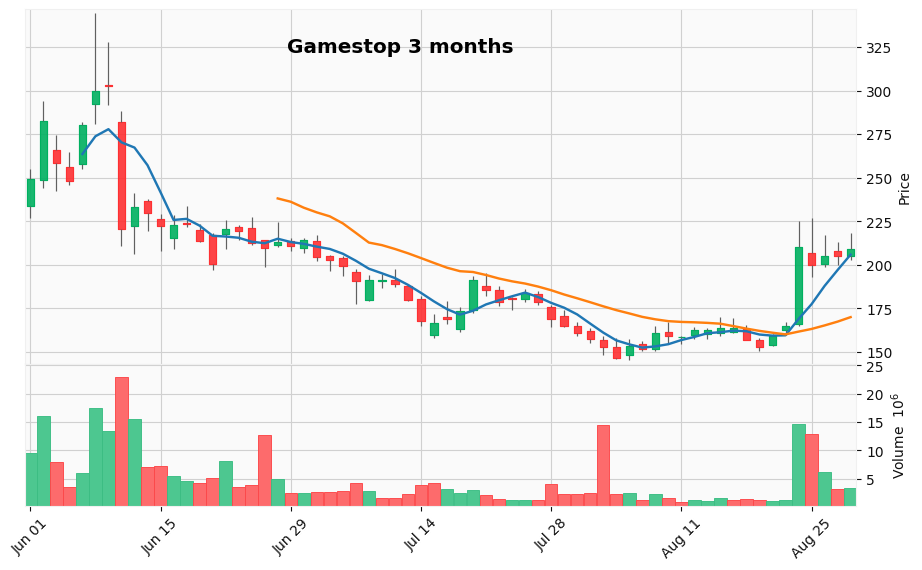

In [21]:
mpf.plot(yf.Ticker('GME').history(period='3mo'), 
         type='candle', volume=True, 
         title="Gamestop 3 months", figratio=(10,6),
         mav=(5,20), tight_layout=True, style='yahoo',
       )